Dataset Head:
    PID  Names            Date   Brand  \
0  1499    NaN    July 9, 2024  Rapido   
1  1501    NaN  August 3, 2024  Rapido   
2  1502    NaN  August 3, 2024  Rapido   
3  1503    NaN  August 7, 2024  Rapido   
4  1504    NaN   July 13, 2024  Rapido   

                                             Comment   Outcome   Source_File  \
0  I've had a terrible experience with Rapido rec...  Negative  Rapido1.xlsx   
1  I have the worst experience with rapido, it's ...  Negative  Rapido1.xlsx   
2  I started using Rapido because the cabs come q...  Negative  Rapido1.xlsx   
3  The drivers rarely arrives on time, which defe...  Negative  Rapido1.xlsx   
4  Please remove the auto option from your app. Y...  Negative  Rapido1.xlsx   

                       Name  \
0                Kiru Bareh   
1           jasmini sakhare   
2  Pankhuri Sisodia Karande   
3              Sania Sawant   
4             UTKARSH RAWAL   

                                     Cleaned_Comment  Polarity_Co

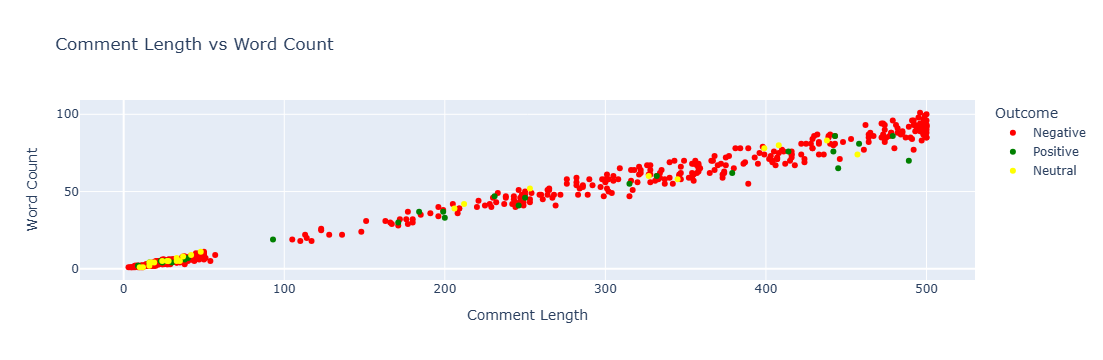

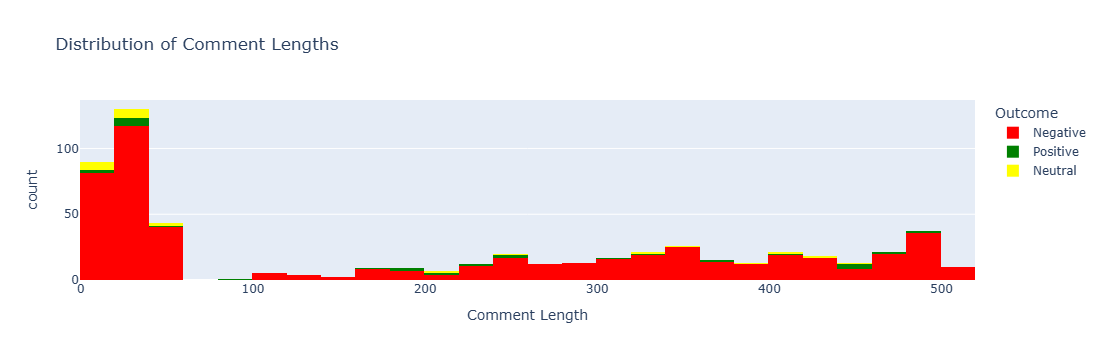

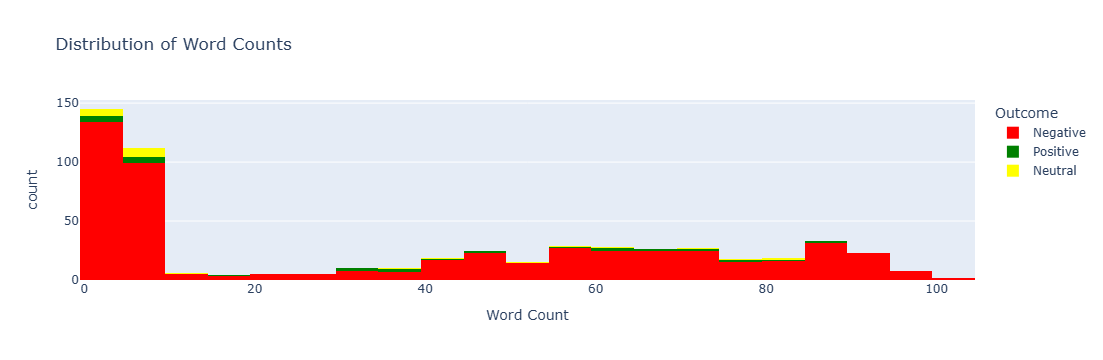


Top 20 Bigrams:
                   count
extra money           31
customer support      30
worst app             29
customer service      28
customer care         23
cancel ride           22
worst experience      21
use app               20
rapido wallet         19
bad experience        19
using rapido          17
experience rapido     16
worst service         14
drop location         12
bad service           12
driver took           12
auto drivers          12
book auto             11
auto driver           11
app shows             11


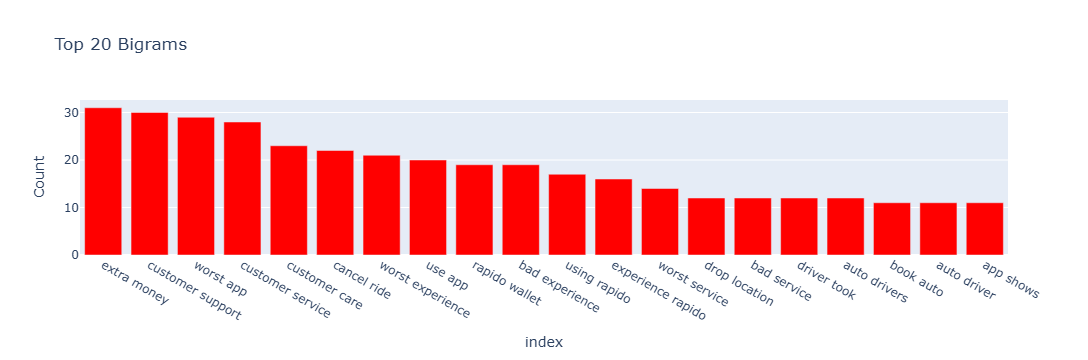


Top 20 Trigrams:
                               count
don use app                        4
demands extra money                4
worst experience rapido            4
worst customer service             4
asking extra money                 4
ask extra money                    4
rapido wallet use                  4
extra money driver                 3
rapido wallet used                 3
wallet used bike                   3
money rapido wallet                3
rapido app drivers                 3
worst customer support             3
happened multiple times            3
drivers accept ride                3
drivers asking extra               3
driver took different              3
extremely disappointed rapido      3
bad customer service               3
app charge extra                   3


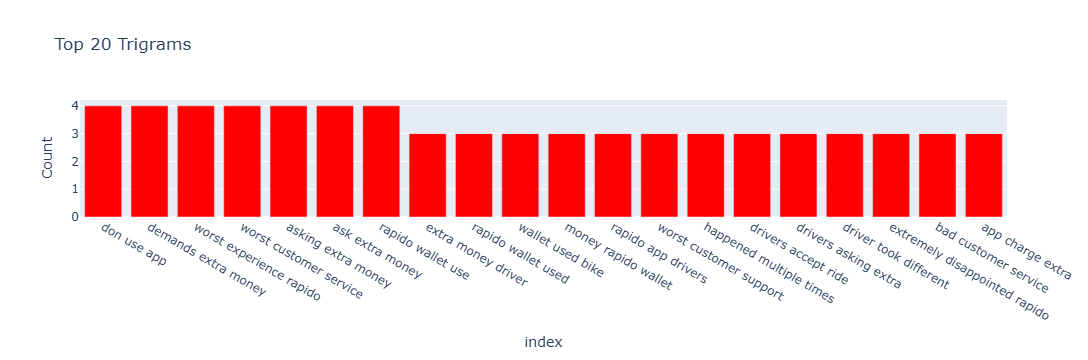

In [1]:
import pandas as pd 
import plotly.express as px 
from sklearn.feature_extraction.text import CountVectorizer 

# Load your dataset 
file_path = r"C:\Users\har15\Downloads\ba proj\post-data\Rapido1_Graded.xlsx"  # Update this with your actual file path
df = pd.read_excel(file_path) 

# Basic EDA 
print("Dataset Head:") 
print(df.head()) 
print("\nMissing Values:") 
print(df.isnull().sum()) 

# Replace NaN values with an empty string before applying the length function
df['comment_length'] = df['Comment'].fillna('').apply(len)
df['word_count'] = df['Comment'].fillna('').apply(lambda x: len(x.split())) 

# Interactive scatter plot for comment length vs word count 
fig = px.scatter(df, x='comment_length', y='word_count', 
                 color='Outcome', 
                 title='Comment Length vs Word Count', 
                 labels={'comment_length': 'Comment Length', 
                         'word_count': 'Word Count'}, 
                 hover_data=['Comment'],
                 color_discrete_sequence=['red', 'green', 'yellow'])  # Custom colors
fig.show() 

# Interactive histogram for comment lengths 
fig_length = px.histogram(df, x='comment_length', nbins=30, 
                          color='Outcome', 
                          title='Distribution of Comment Lengths', 
                          labels={'comment_length': 'Comment Length'},
                          color_discrete_sequence=['red', 'green', 'yellow'])  # Custom colors
fig_length.show() 

# Interactive histogram for word counts 
fig_word_count = px.histogram(df, x='word_count', nbins=30, 
                              color='Outcome', 
                              title='Distribution of Word Counts', 
                              labels={'word_count': 'Word Count'},
                              color_discrete_sequence=['red', 'green', 'yellow'])  # Custom colors
fig_word_count.show() 

# N-gram analysis function 
def get_ngrams(comments, n=2, top_n=20):  
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english') 
    ngrams = vectorizer.fit_transform(comments) 
    ngram_counts = ngrams.sum(axis=0) 
    ngram_features = vectorizer.get_feature_names_out() 
    # Create a DataFrame of n-grams and their counts 
    ngram_df = pd.DataFrame(ngram_counts.A1, index=ngram_features, columns=['count']) 
    return ngram_df.sort_values(by='count', ascending=False).head(top_n) 

# Generate and display bigrams 
comments = df['Comment'].dropna() 
bigrams = get_ngrams(comments, n=2, top_n=20)  
print("\nTop 20 Bigrams:") 
print(bigrams) 

# Bar plot for bigrams 
fig_bigrams = px.bar(bigrams, x=bigrams.index, y='count', 
                     title='Top 20 Bigrams', 
                     labels={'x': 'Bigrams', 'count': 'Count'},
                     color_discrete_sequence=['red', 'green', 'yellow'])  # Custom colors
fig_bigrams.show() 

# Generate and display trigrams 
trigrams = get_ngrams(comments, n=3, top_n=20)  
print("\nTop 20 Trigrams:") 
print(trigrams) 

# Bar plot for trigrams 
fig_trigrams = px.bar(trigrams, x=trigrams.index, y='count', 
                      title='Top 20 Trigrams', 
                      labels={'x': 'Trigrams', 'count': 'Count'},
                      color_discrete_sequence=['red', 'green', 'yellow'])  # Custom colors
fig_trigrams.show()
